In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Exploring the training data

We have the following features:
- ids (string)
- comment_text (string)
- toxic (boolean)
- severe_toxic (boolean)
- obscene (boolean)
- threat (boolean)
- insult (boolean)
- identity_hate (boolean)


In [42]:
df = pd.read_csv('../data/kaggle/train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


## Amount of Rows / Length

In [4]:
total = len(df)
total

159571

In [5]:
is_toxic = df[df['toxic'] == 1]
total_is_toxic = len(is_toxic)

is_severe_toxic = df[df['severe_toxic'] == 1]
total_is_severe_toxic = len(is_severe_toxic)

is_obscene = df[df['obscene'] == 1]
total_is_obscene = len(is_obscene)

is_threat = df[df['threat'] == 1]
total_is_threat = len(is_threat)

is_insult = df[df['insult'] == 1]
total_is_insult = len(is_insult)

is_identity_hate = df[df['identity_hate'] == 1]
total_is_identity_hat = len(is_identity_hate)

In [87]:
# Plotting config
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

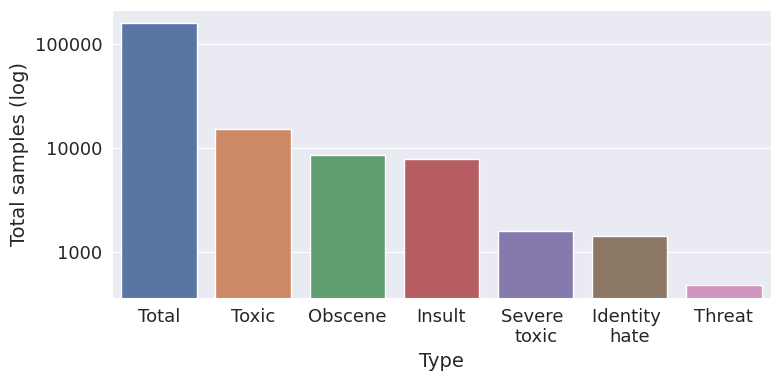

In [91]:
df_classes = df[["id", "toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

df_long = pd.melt(df_classes, id_vars='id', value_vars=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
grouped = df_long.groupby('variable', as_index=False).sum(numeric_only = True)

add_data = pd.DataFrame.from_dict({'variable':['total'], 'value':[total]})
grouped = pd.concat([grouped, add_data], ignore_index=True)

grouped = grouped.sort_values(by='value', ascending = False)

plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=grouped['variable'], y=grouped['value'], palette='deep', errorbar=None)
ax.set(title='', xlabel='Type', ylabel='Total samples (log)')

labels = [item.get_text().capitalize() for item in ax.get_xticklabels()]
labels[4] = 'Severe \ntoxic'
labels[5] = 'Identity \nhate'
ax.set_xticklabels(labels)

plt.yscale('log')

ax.yaxis.set_major_formatter(ScalarFormatter())

plt.show()